In [2]:
import numpy as np
import tensorflow as tf
import mne 
import matplotlib.pyplot as plt
import sys

In [5]:
# Import the data using MNE
raw = mne.io.read_raw_bdf(r"C:\Users\desmo\OneDrive\Desktop\CARL\Data\OpenBCI\OpenBCI-BDF-2024-01-27_16-54-38.bdf", preload=True)

Extracting EDF parameters from C:\Users\desmo\OneDrive\Desktop\CARL\Data\OpenBCI\OpenBCI-BDF-2024-01-27_16-54-38.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3249  =      0.000 ...    25.992 secs...


Using matplotlib as 2D backend.


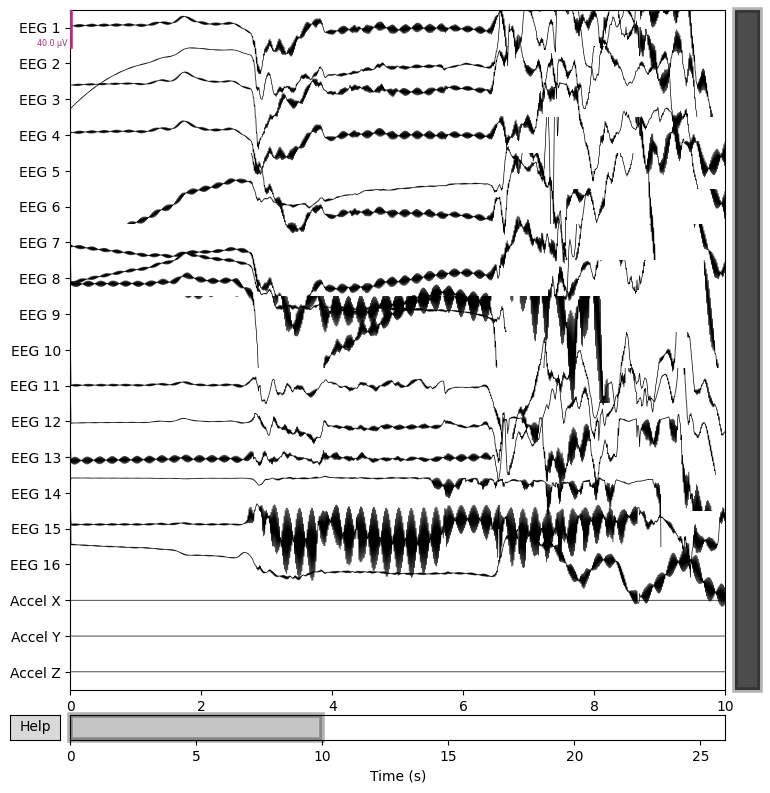

Measurement date,"January 27, 2024 16:54:39 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.00 Hz
Lowpass,62.50 Hz


In [6]:
raw.plot()
raw.info

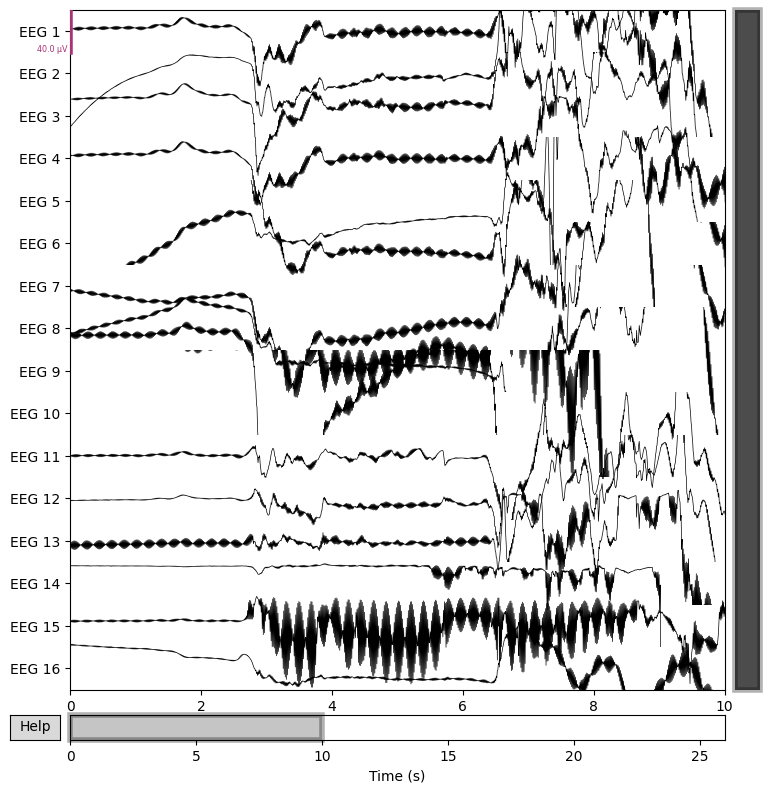

Measurement date,"January 27, 2024 16:54:39 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.00 Hz
Lowpass,62.50 Hz


In [7]:
# Remove the Accelerometer channels
raw.drop_channels(["Accel X", "Accel Y", "Accel Z"])
raw.plot()
raw.info

In [8]:
# Check for auto-detected bad channels
raw.info["bads"]

[]

In [9]:
# Here, I'm skipping filtering. Feature extraction can be done through machine learning or manually with filters.
data, times = raw[:]

In [32]:
data.shape

(16, 3250)

In [54]:
# We have 3,250 samples on 16 channels. 
# Create a basic LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(16, 1), return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 16, 32)            4352      
                                                                 
 lstm_6 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12705 (49.63 KB)
Trainable params: 12705 (49.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
sample = data[:, 0]
test_prediction = model(sample.reshape(1, 16, 1))

In [59]:
test_prediction.numpy()

array([[0.5000035]], dtype=float32)